In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
path='Chennai_house_univariate.csv'


In [3]:
raw_data=pd.read_csv(path)
raw_data.head()

,Size,Price
0,721.82,1480000
1,543.69,830000
2,851.72,2060000
3,931.02,2410000
4,552.77,860000


In [4]:
raw_data.tail()

,Size,Price
92,570.77,930000
93,552.04,860000
94,513.01,700000
95,747.64,1580000
96,2034.10,7710000


<AxesSubplot:xlabel='Size', ylabel='Price'>

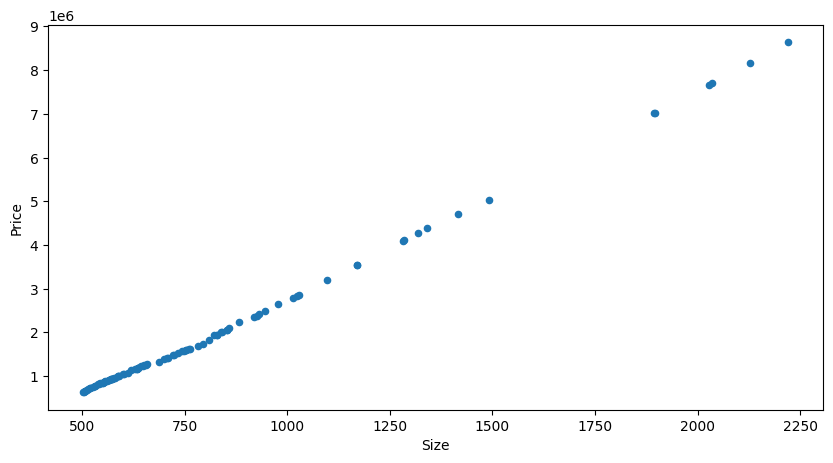

In [5]:
raw_data.plot(kind='scatter',x='Size',y='Price',figsize=(10,5))

In [6]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()

,Size,Price
0,-0.054820,-0.063773
1,-0.158528,-0.144922
2,0.020808,0.008636
3,0.066977,0.052331
4,-0.153242,-0.141177


<AxesSubplot:xlabel='Size', ylabel='Price'>

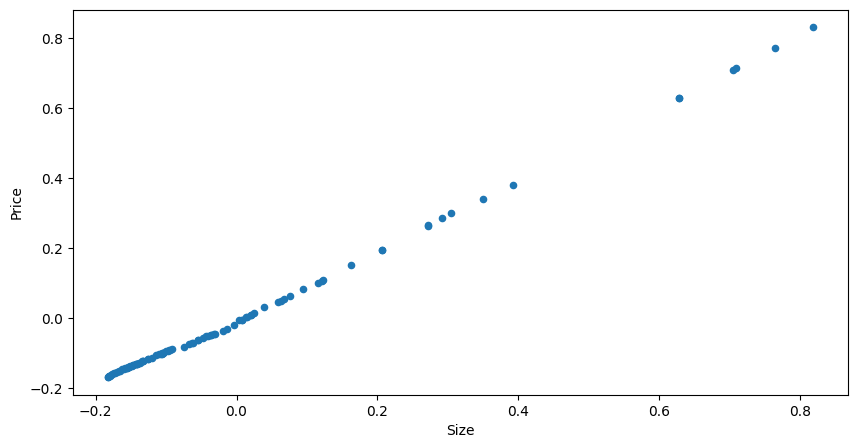

In [7]:
data.plot(kind='scatter',x='Size',y='Price',figsize=(10,5))

In [8]:
data.shape

(97, 2)

In [9]:
data.shape[0]

97

In [10]:
data.shape[1]

2

In [11]:
data.insert(0,'ones',1)

In [12]:
data.head()

,ones,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


In [13]:
cols=data.shape[1]

In [14]:
print(cols)

3


In [15]:
x=data.iloc[:,0:cols-1]

In [16]:
y=data.iloc[:,cols-1:cols]

In [17]:
theta=np.matrix([10,10])

In [18]:
x=np.matrix(x)

In [19]:
y=np.matrix(y)

In [20]:
x.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [21]:
 def computeError(x,y,theta):
   inner=np.power(((x*theta.T)-y),2)
   return np.sum(inner)/(2*len(x))


In [22]:
computeError(x,y,theta)

52.04227733164415

In [23]:
line_model=(x*theta.T)

Text(0.5, 1.0, 'i vs data')

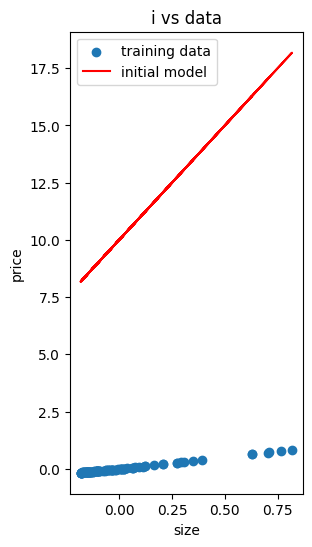

In [24]:
fig,ax=plt.subplots(figsize=(3,6))
ax.scatter(data.Size,data.Price,label='training data')
ax.plot(data.Size,line_model,'r',label='initial model')
ax.legend()
ax.set_xlabel('size')
ax.set_ylabel('price')
ax.set_title('i vs data')

In [25]:
learn_rate=1
iters=350
def gradientDescent(x,y,theta,learn_rate,iters):
  temp=np.matrix(np.zeros(theta.shape))
  parameters=theta.shape[1]
  cost=[]

  for i in range(iters):
    error=(x*theta.T)-y

    for j in range(parameters):
      gradient=np.multiply(error,x[:,j])
      temp[0,j]=theta[0,j]-((learn_rate/len(x))*np.sum(gradient))
    theta= temp
    cost_iter=computeError(x,y,theta)
    cost.append(cost_iter)
  return theta,cost  

In [26]:
new_theta,cost = gradientDescent(x,y,theta,learn_rate,iters)

In [27]:
 print(new_theta)

[[1.08733183e-17 9.83386736e-01]]


In [28]:
print(cost)

[1.8422310503366268, 1.661780338796969, 1.4990057094345264, 1.352175698413719, 1.219728447753016, 1.1002550915527423, 0.9924847696279504, 0.8952711091336067, 0.8075800303846297, 0.7284787471590407, 0.6571258444784154, 0.5927623283211478, 0.5347035520626775, 0.4823319337627266, 0.43509038683198853, 0.39247639419905106, 0.35403666294337355, 0.31936230253466047, 0.28808447538867227, 0.25987047347362924, 0.2344201792333482, 0.2114628731812942, 0.19075435420733602, 0.1720743419653764, 0.155224133710572, 0.14002449066148953, 0.12631373140403943, 0.11394601205637342, 0.10278977490054146, 0.09272634897871598, 0.0836486877682666, 0.07546023050810237, 0.06807387506399813, 0.06141105140708455, 0.055400885849920325, 0.04997944714997196, 0.04508906646116345, 0.040677723899695616, 0.03669849519892161, 0.03310905256724469, 0.029871214439570973, 0.026950539332940286, 0.024315959486102483, 0.02193945038599547, 0.019795732665816922, 0.017862003203724587, 0.01611769256181204, 0.014544246185193689, 0.0131

In [29]:
print(new_theta[0,0])

1.0873318282411331e-17


In [30]:
model_price=x*new_theta.T

Text(0.5, 1.0, 'f vs t data')

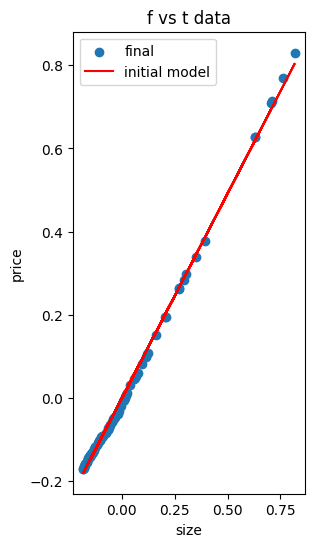

In [31]:
fig,ax=plt.subplots(figsize=(3,6))
ax.scatter(data.Size,data.Price,label='final')
ax.plot(data.Size,model_price,'r',label='initial model')
ax.legend()
ax.set_xlabel('size')
ax.set_ylabel('price')
ax.set_title('f vs t data')

Text(0.5, 1.0, 'err vs iterations')

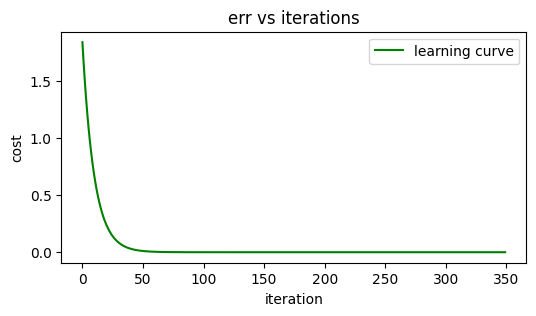

In [32]:
fig,ax= plt.subplots(figsize=(6,3))
ax.plot(np.arange(iters),cost,'g',label='learning curve')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('cost')
ax.set_title('err vs iterations')

In [33]:
from sklearn.metrics import mean_absolute_error

Error=mean_absolute_error(model_price,y)
Accuracy=1-Error

print('Error={}%'.format((round(Error*100,2))))
print('Accuracy={}%'.format((round(Accuracy*100,2))))

Error=0.94%
Accuracy=99.06%


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [34]:
def predict(new_theta,accuracy):
  size=float(input("enter the size of the house in sqft:"))
  size=(size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
  price=(new_theta[0,0]+(new_theta[0,1]*size))
  Predicted_Price=(price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
  price_at_max_accuracy =(Predicted_Price*(1/accuracy))
  price_range=price_at_max_accuracy - Predicted_Price
  return Predicted_Price,price_range

In [35]:
Predicted_Price,price_range=predict(new_theta,Accuracy)
print('Your house cost is '+str(round(Predicted_Price*(1/100000), 2))+' Lakhs (+ or -) '+str(round(price_range, 2)))

enter the size of the house in sqft:1500
Your house cost is 51.28 Lakhs (+ or -) 48908.12
